In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [2]:
# 1. Tworzymy nieliniowy zbiór danych: punkty wewnątrz i na zewnątrz okręgu
np.random.seed(42)
n = 1000
theta = 2 * np.pi * np.random.rand(n)
r = 0.5 + 0.5 * np.random.rand(n)
x1 = r * np.cos(theta)
x2 = r * np.sin(theta)
X_in = np.stack([x1, x2], axis=1)
y_in = np.zeros(n)

In [3]:
theta = 2 * np.pi * np.random.rand(n)
r = 1.5 + 0.5 * np.random.rand(n)
x1 = r * np.cos(theta)
x2 = r * np.sin(theta)
X_out = np.stack([x1, x2], axis=1)
y_out = np.ones(n)

X = np.concatenate([X_in, X_out])
y = np.concatenate([y_in, y_out])

In [4]:
# 2. Trenujemy prostą sieć MLP
model = keras.Sequential([
    keras.layers.Dense(8, activation='relu', input_shape=(2,)),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X, y, epochs=30, batch_size=32, verbose=0)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2813/2813 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step


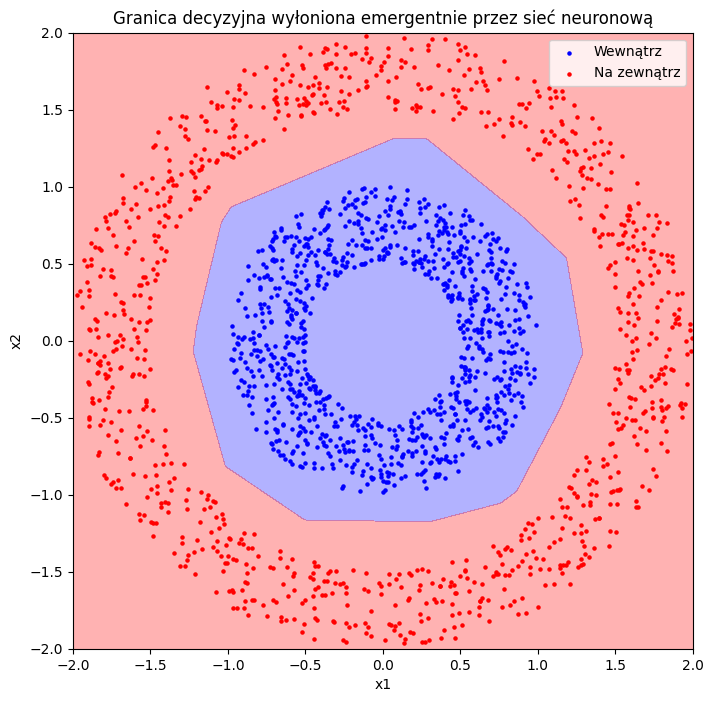

In [5]:
# 3. Rysujemy granicę decyzyjną (emergencja nieliniowa!)
xx, yy = np.meshgrid(np.linspace(-2, 2, 300), np.linspace(-2, 2, 300))
X_grid = np.c_[xx.ravel(), yy.ravel()]
probs = model.predict(X_grid).reshape(xx.shape)

plt.figure(figsize=(8, 8))
plt.contourf(xx, yy, probs, levels=[0, 0.5, 1], alpha=0.3, colors=['blue', 'red'])
plt.scatter(X[y==0][:,0], X[y==0][:,1], color='blue', s=5, label='Wewnątrz')
plt.scatter(X[y==1][:,0], X[y==1][:,1], color='red', s=5, label='Na zewnątrz')
plt.legend()
plt.title('Granica decyzyjna wyłoniona emergentnie przez sieć neuronową')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()